# Level 1








**Task 1: Top Cuisines**
- Determine the top three most common cuisines in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset:
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
#Names of row and colunms:
df.shape

(9551, 21)

In [4]:
cuisine_count = df['Cuisines'].str.split(',',).explode().value_counts()

top_three_cuisine=cuisine_count.head(3)
print("Top 3 most common Cuisines:\n", top_three_cuisine)

Top 3 most common Cuisines:
 Cuisines
North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64


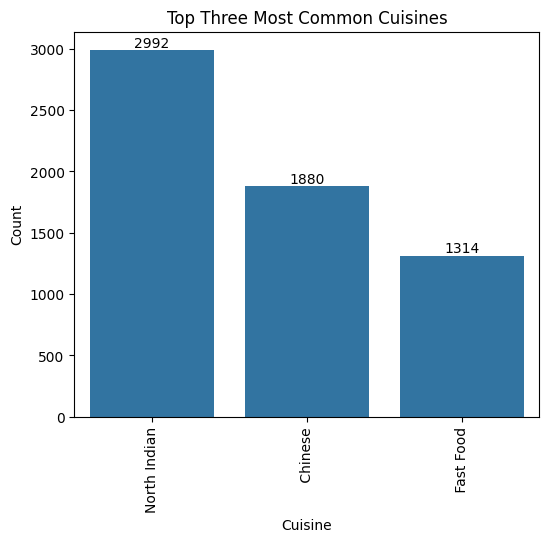

In [5]:
top_three_cuisine = top_three_cuisine.sort_values(ascending=False)

fig,ax=plt.subplots(figsize=(6,5))
ax = sns.barplot(x = top_three_cuisine.index, y = top_three_cuisine.values)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top Three Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

- Calculate the percentage of restaurants that serve each of the top cuisines.

In [6]:
top_restaurents = len(df)
percentage_per_cuisine = (top_three_cuisine/top_restaurents)*100
print("Percentage of Restaurants for top 3 Cuisines:\n", percentage_per_cuisine)

Percentage of Restaurants for top 3 Cuisines:
 Cuisines
North Indian    31.326563
 Chinese        19.683803
 Fast Food      13.757722
Name: count, dtype: float64


Text(0.5, 1.0, 'Percentage of Restaurants Serving Top Three Cuisines')

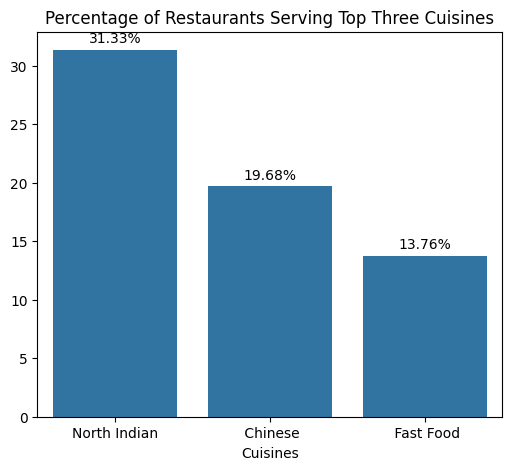

In [9]:
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.barplot(x=percentage_per_cuisine.index, y = percentage_per_cuisine.values)
for bar in ax.containers[0]:
  height = bar.get_height()
  ax.annotate(f'{height:.2f}%', xy=(bar.get_x()+bar.get_width()/2, height),xytext=(0,3), textcoords='offset points', ha='center',va='bottom')
plt.title("Percentage of Restaurants Serving Top Three Cuisines")

**Task 2: City Analysis**
- Identify the city with the highest number of restaurants in the dataset.

In [10]:
print("City with Highest number of Restaurants:")
print(df['City'].value_counts()[[0]].index[0])

City with Highest number of Restaurants:
New Delhi


C:\Users\hp\AppData\Local\Temp\ipykernel_15340\735539039.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df['City'].value_counts()[[0]].index[0])


- Calculate the average rating for restaurants in each city.

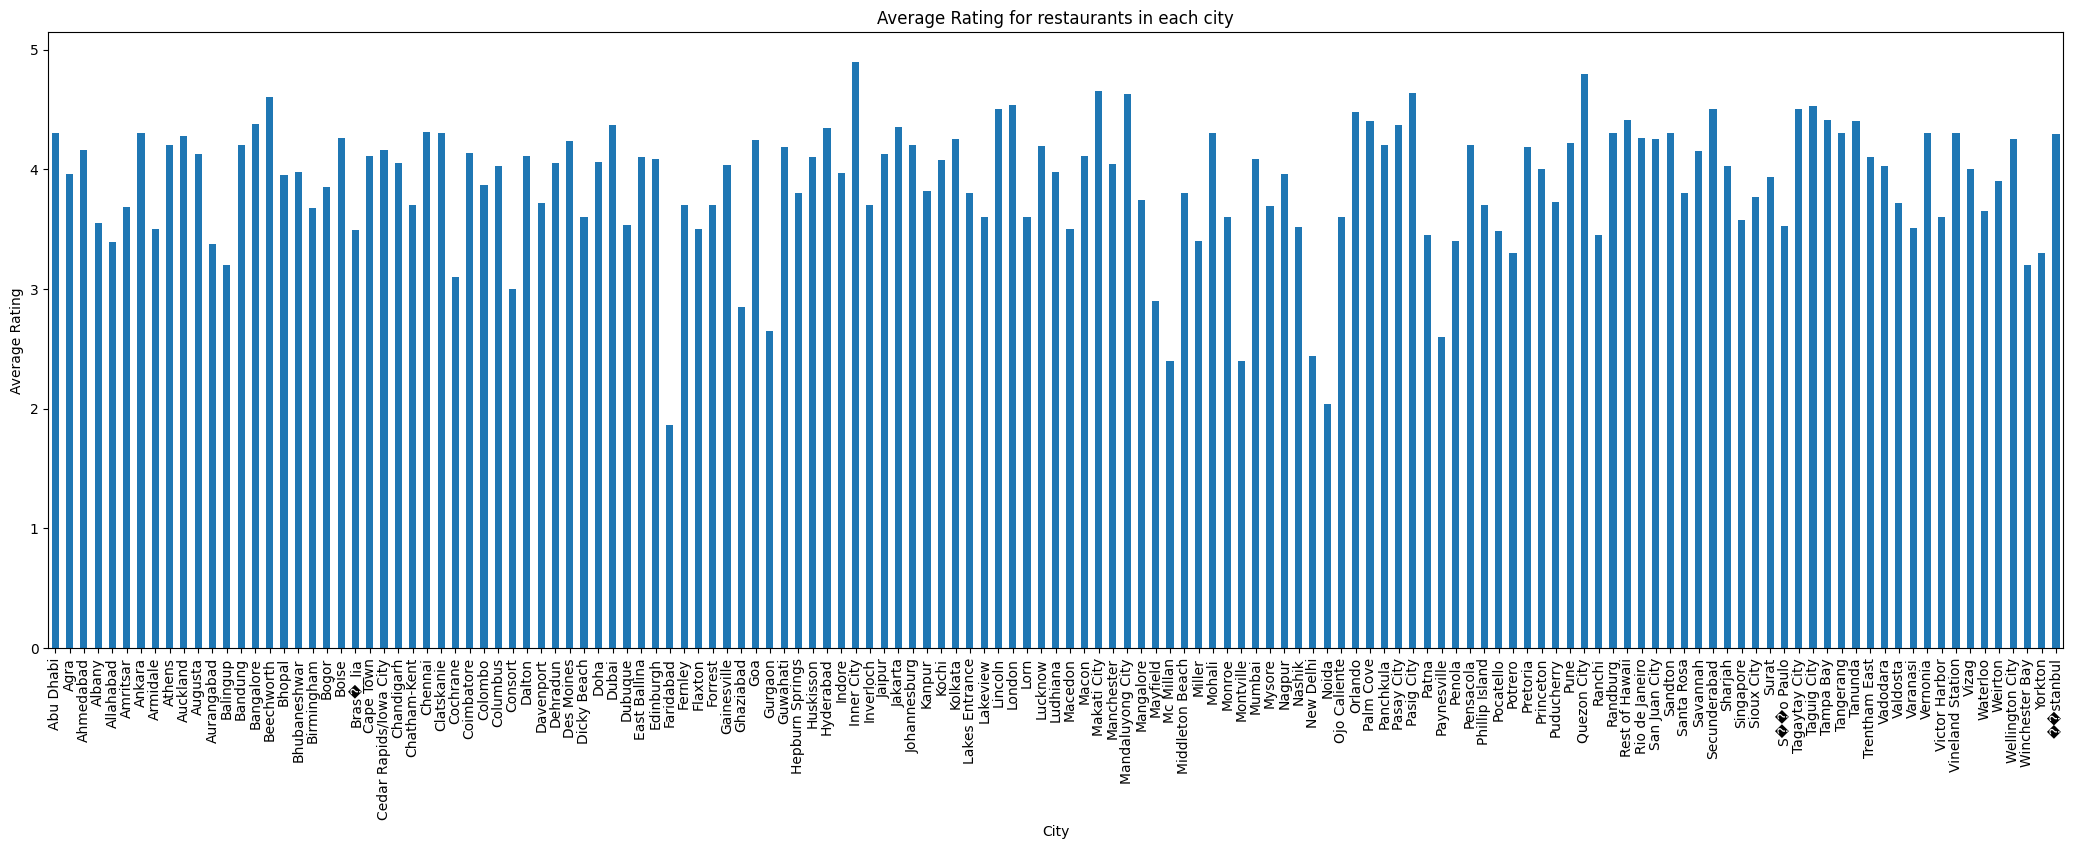

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


In [11]:
#Create a Dataframe that holds the average rating for restaurents in each city:
average_rating=df.groupby('City')['Aggregate rating'].mean()
average_rating.plot(kind = 'bar', figsize = (26,8))
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Rating for restaurants in each city')
plt.show()
print(average_rating)

- Determine the city with the highest

In [27]:
city_with_highest_average_rating = average_rating.idxmax()
print('The City with the highest average rating is :', city_with_highest_average_rating)

The City with the highest average rating is : Inner City


**Tasks 3: Price Range Distribution**

- Create a histogram or bar chart to
visualize the distribution of price ranges
among the restaurants.

In [17]:
price_range_counts = df['Price range'].value_counts().sort_index()

In [18]:
total_restaurants = len(df)
percentage_per_price_range = (price_range_counts/total_restaurants)*100

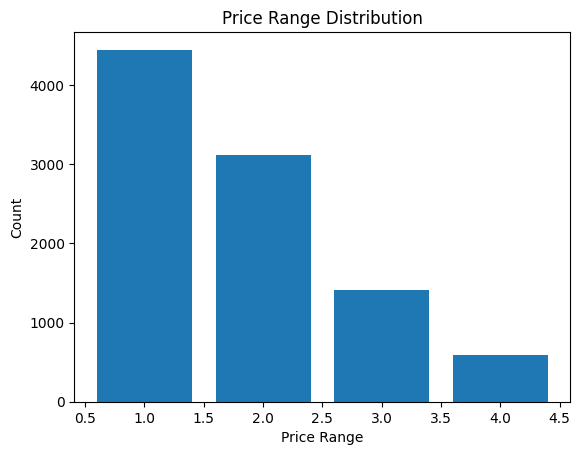

In [19]:
plt.bar(price_range_counts.index, price_range_counts.values)
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

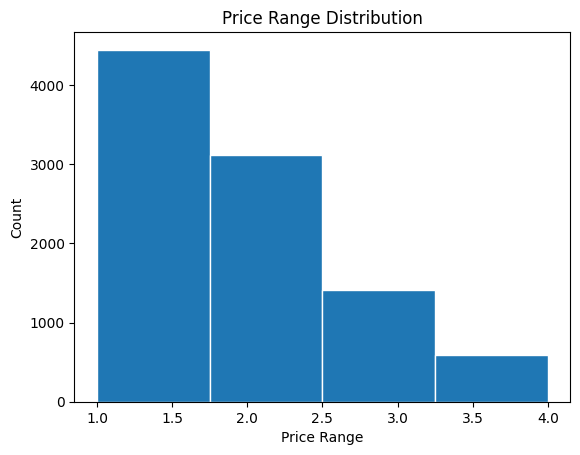

In [20]:
plt.hist(df['Price range'],bins=df['Price range'].nunique(),edgecolor='white')
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

- Calculate the percentage of restaurants in each price range category.

In [21]:
print("Percentage od restaurants in each price range Category:", percentage_per_price_range)

Percentage od restaurants in each price range Category: Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


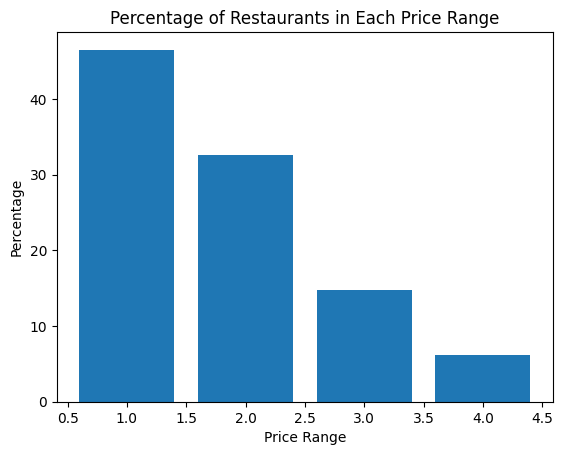

In [22]:
plt.bar(percentage_per_price_range.index, percentage_per_price_range.values)
plt.title('Percentage of Restaurants in Each Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.show()

**Task 4: Online Delivery**
- Determine the percentage of restaurants that offer online delivery.

In [23]:
total_restaurants=len(df)
restaurants_with_onlinedelivery = df['Has Online delivery'].value_counts().get('Yes', 0)
percentage_with_onlinedelivery=(restaurants_with_onlinedelivery/total_restaurants)*100
print("The Percentage of Restaurants that offer Online Delivery is",percentage_with_onlinedelivery)

The Percentage of Restaurants that offer Online Delivery is 25.662234321013504


- Compare the average ratings of restaurants with and without online delivery

In [24]:
average_rating_with_onlinedelivery = df[df['Has Online delivery']=='Yes']['Aggregate rating'].mean()
print('Average Rating of restaurants with online delivery is:',(average_rating_with_onlinedelivery))

Average Rating of restaurants with online delivery is: 3.2488372093023257


In [25]:
average_rating_without_onlinedelivery = df[df['Has Online delivery']=='No']['Aggregate rating'].mean()
print('Average Rating of restaurants with online delivery is:',(average_rating_without_onlinedelivery))

Average Rating of restaurants with online delivery is: 2.465295774647887


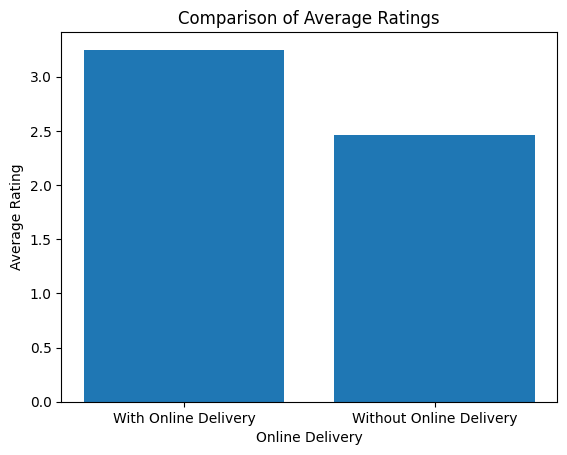

In [26]:
labels = ['With Online Delivery','Without Online Delivery']
average_ratings = [average_rating_with_onlinedelivery, average_rating_without_onlinedelivery]

plt.bar(labels, average_ratings)
plt.title('Comparison of Average Ratings')
plt.xlabel('Online Delivery')
plt.ylabel('Average Rating')
plt.show()